In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import skew,kurtosis
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [4]:
df = pd.read_csv('Data_to_Transform.csv')
df.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


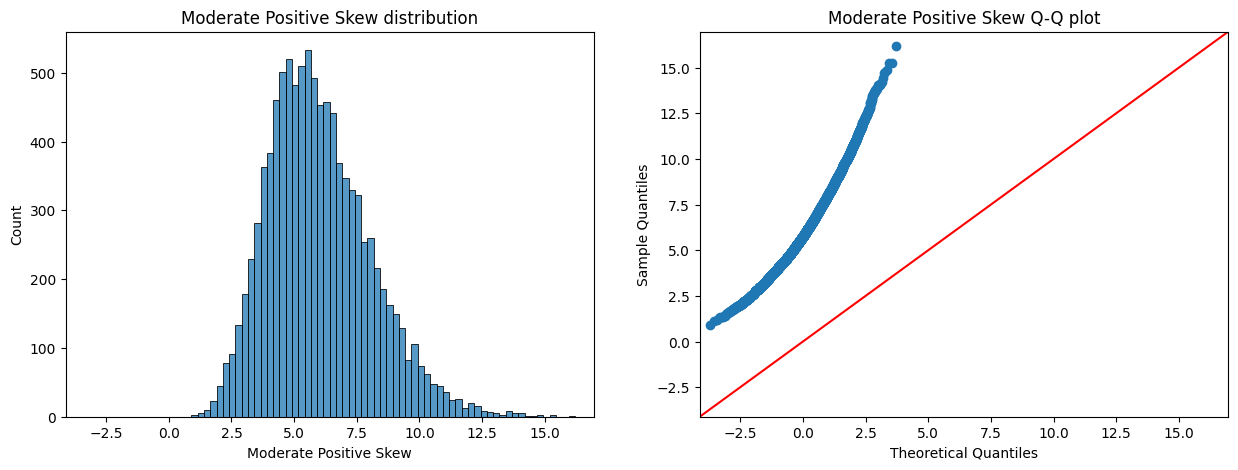

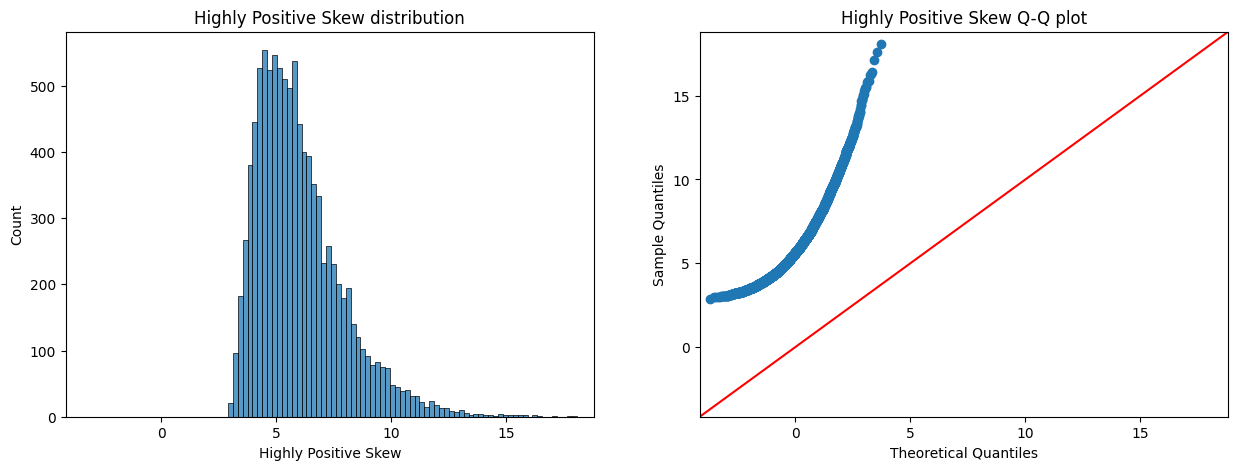

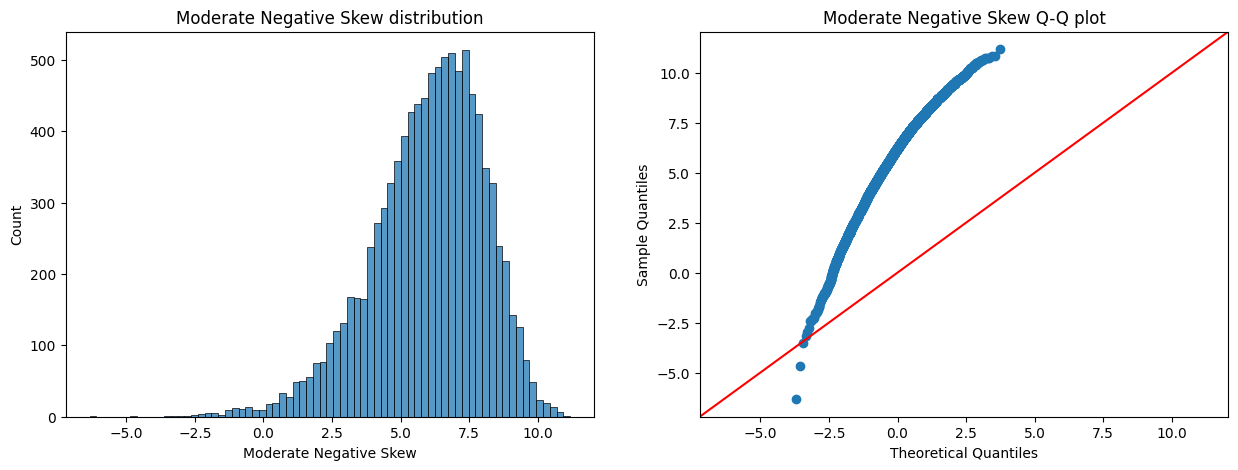

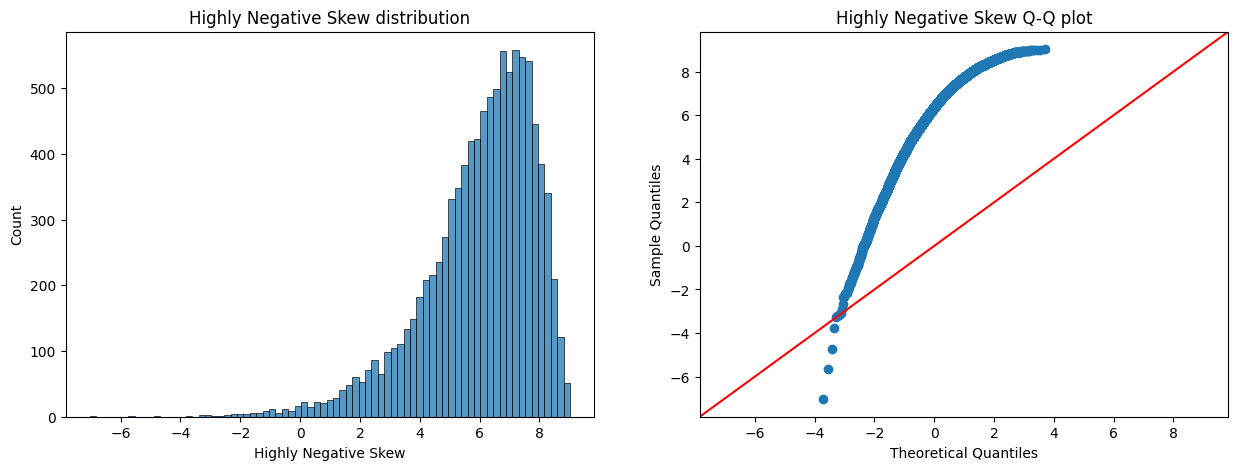

In [15]:
for c in df.columns:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    sns.histplot(data[c], ax=axes[0] )
    axes[0].set_title(f'{c} distribution')
    sm.qqplot(data[c], ax=axes[1], line = '45')
    axes[1].set_title(f'{c} Q-Q plot')

In [52]:
for c in df.columns:    
    stat, p_val = shapiro(df[c])
    print(c)
    print(p_val)
    if -0.05 <=p_val <= 0.05:
        print('Fairly Symmetrical')
    elif -0.5 <=p_val<= -1.0 and 0.5 <=p_val<= 1.0:
        print('Moderate Skewed')
    elif p_val <= -1.0 and p_val >= 1.0:
        print('Moderate Skewed')

Moderate Positive Skew
0.6668717861175537
Highly Positive Skew
3.415972067927556e-14
Fairly Symmetrical
Moderate Negative Skew
1.2290490673805277e-11
Fairly Symmetrical
Highly Negative Skew
1.3156472339926362e-27
Fairly Symmetrical


In [46]:
boxcox = PowerTransformer(method='box-cox')
yeojohn = PowerTransformer(method='yeo-johnson')
df_boxcox = pd.DataFrame(columns=['Moderate Positive Skew', 'Highly Positive Skew', 'Moderate Negative Skew', 'Highly Negative Skew'])

for c in range(len(df.columns)):
    if df.iloc[:, c].min() >= 0: 
        data_boxcox = boxcox.fit_transform(df.iloc[:, c].values.reshape(-1, 1))
        df_boxcox.iloc[:, c] = data_boxcox.ravel()        
    else:
        data_boxcox = yeojohn.fit_transform(df.iloc[:, c].values.reshape(-1, 1))
        df_boxcox.iloc[:, c] = data_boxcox.ravel()     
df_boxcox.head()

C:\Users\vanzo\AppData\Local\Temp\ipykernel_13220\133439968.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_boxcox.iloc[:, c] = data_boxcox.ravel()
C:\Users\vanzo\AppData\Local\Temp\ipykernel_13220\133439968.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_boxcox.iloc[:, c] = data_boxcox.ravel()
C:\Users\vanzo\AppData\Local\Temp\ipykernel_13220\133439968.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old beha

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,-3.947500,-2.821577,3.292906,2.419401
1,-3.614772,-2.705397,3.030648,2.398951
2,-3.552512,-2.698634,3.011441,2.394772
3,-3.404388,-2.641695,2.970546,2.387856
4,-3.325370,-2.622160,2.961786,2.366229


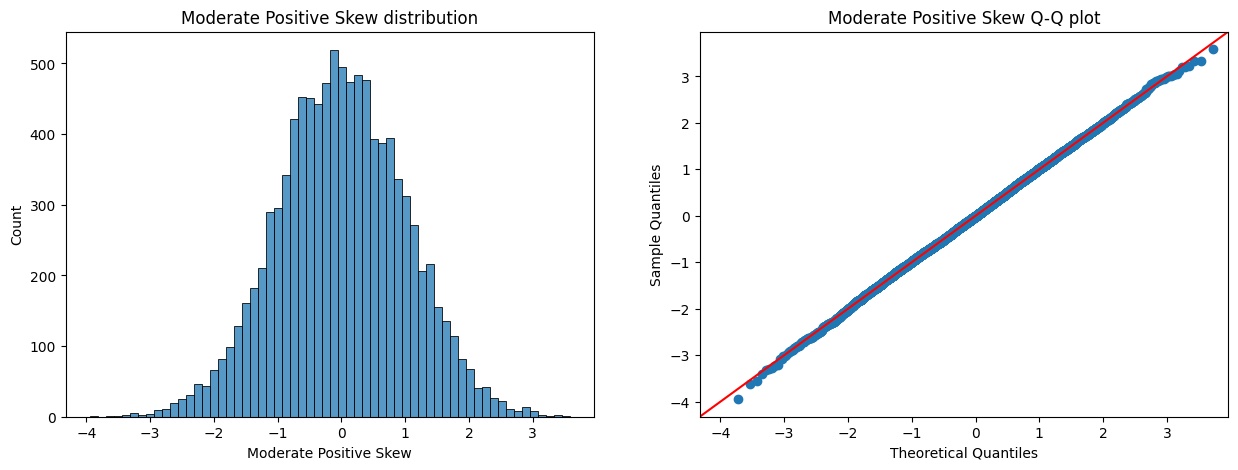

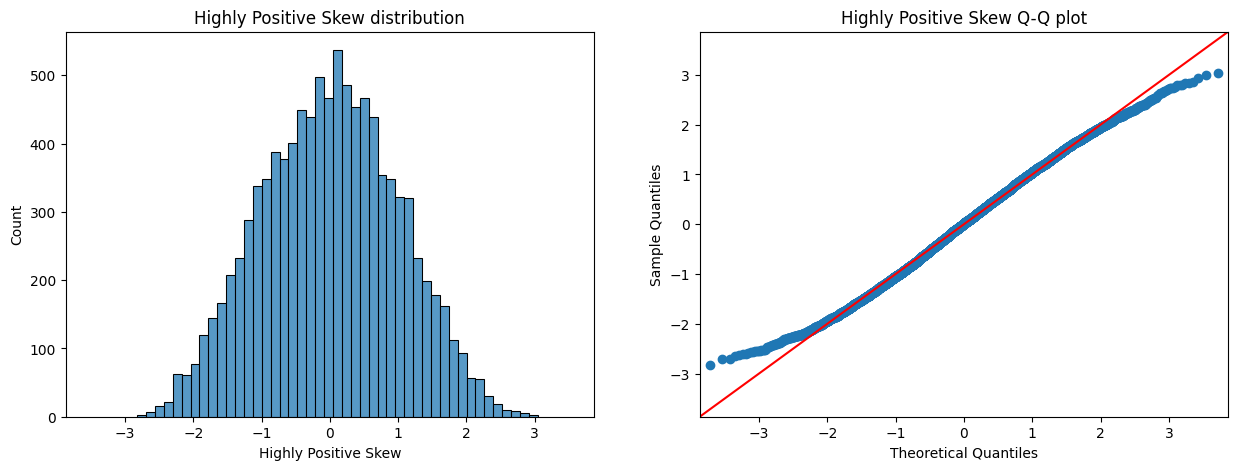

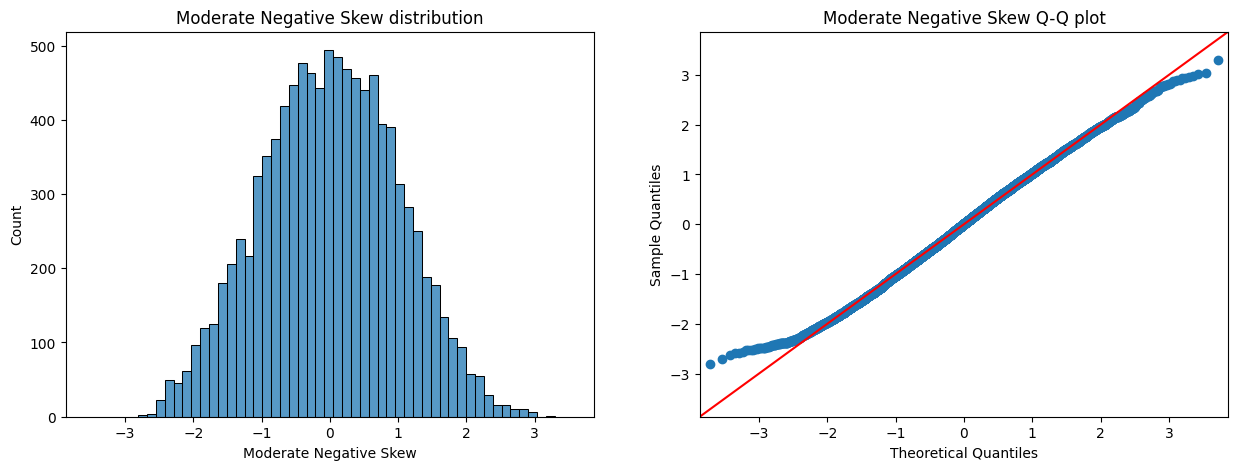

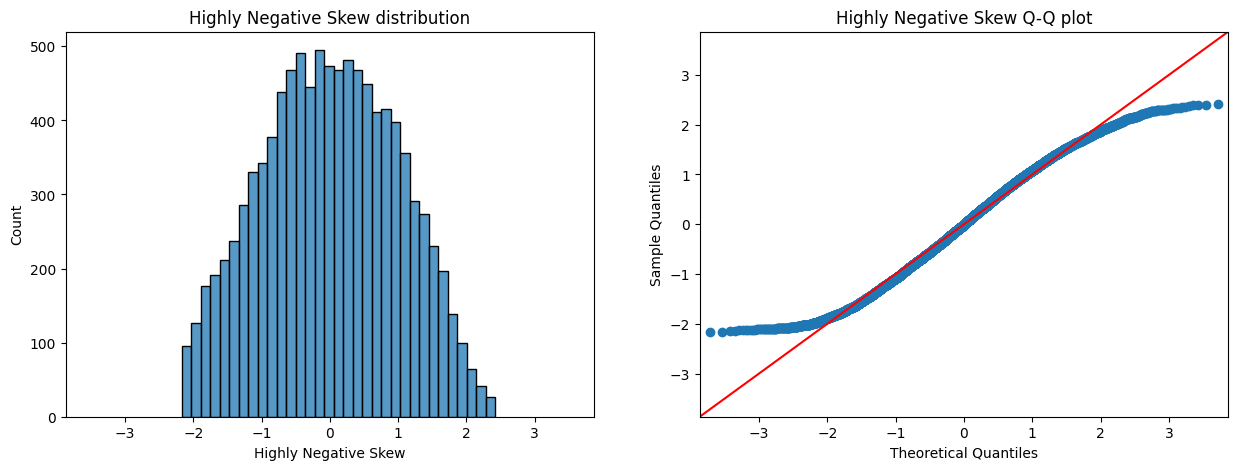

In [32]:
for c in df_boxcox.columns:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    sns.histplot(df_boxcox[c], ax=axes[0] )
    axes[0].set_title(f'{c} distribution')
    sm.qqplot(df_boxcox[c], ax=axes[1], line = '45')
    axes[1].set_title(f'{c} Q-Q plot')

In [53]:
for c in df_boxcox.columns:    
    stat, p_val = shapiro(df_boxcox[c])
    print(c)
    print(p_val)
    if -0.05 <=p_val <= 0.05:
        print('Fairly Symmetrical')
    elif -0.5 <=p_val<= -1.0 and 0.5 <=p_val<= 1.0:
        print('Moderate Skewed')
    elif p_val <= -1.0 and p_val >= 1.0:
        print('Moderate Skewed')
        

Moderate Positive Skew
0.6668717861175537
Highly Positive Skew
3.33678024718332e-14
Fairly Symmetrical
Moderate Negative Skew
1.1969109731113647e-11
Fairly Symmetrical
Highly Negative Skew
1.561579628613142e-27
Fairly Symmetrical
